In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

In [3]:
file_path=r"C:\Users\vamshi\Desktop\datasets\lifeexpectancy\life_expectancy.csv"
data=pd.read_csv(file_path)
print(data)

          Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
5     Afghanistan  2010  Developing              58.8            279.0   
6     Afghanistan  2009  Developing              58.6            281.0   
7     Afghanistan  2008  Developing              58.1            287.0   
8     Afghanistan  2007  Developing              57.5            295.0   
9     Afghanistan  2006  Developing              57.3            295.0   
10    Afghanistan  2005  Developing              57.3            291.0   
11    Afghanistan  2004  Developing              57.0            293.0   
12    Afghanistan  2003  Developing   

In [4]:
print(data.shape)

(2938, 22)


In [5]:
print(data.columns)
data.columns = data.columns.str.replace(' ', '')
print(data.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')
Index(['Country', 'Year', 'Status', 'Lifeexpectancy', 'AdultMortality',
       'infantdeaths', 'Alcohol', 'percentageexpenditure', 'HepatitisB',
       'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Totalexpenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years',
       'thinness5-9years', 'Incomecompositionofresources', 'Schooling'],
      dtype='object')


In [6]:
print(data.head())

       Country  Year      Status  Lifeexpectancy  AdultMortality  \
0  Afghanistan  2015  Developing            65.0           263.0   
1  Afghanistan  2014  Developing            59.9           271.0   
2  Afghanistan  2013  Developing            59.9           268.0   
3  Afghanistan  2012  Developing            59.5           272.0   
4  Afghanistan  2011  Developing            59.2           275.0   

   infantdeaths  Alcohol  percentageexpenditure  HepatitisB  Measles  \
0            62     0.01              71.279624        65.0     1154   
1            64     0.01              73.523582        62.0      492   
2            66     0.01              73.219243        64.0      430   
3            69     0.01              78.184215        67.0     2787   
4            71     0.01               7.097109        68.0     3013   

     ...      Polio  Totalexpenditure  Diphtheria  HIV/AIDS         GDP  \
0    ...        6.0              8.16        65.0       0.1  584.259210   
1    ...

In [7]:
print(data.describe())

              Year  Lifeexpectancy  AdultMortality  infantdeaths      Alcohol  \
count  2938.000000     2928.000000     2928.000000   2938.000000  2744.000000   
mean   2007.518720       69.224932      164.796448     30.303948     4.602861   
std       4.613841        9.523867      124.292079    117.926501     4.052413   
min    2000.000000       36.300000        1.000000      0.000000     0.010000   
25%    2004.000000       63.100000       74.000000      0.000000     0.877500   
50%    2008.000000       72.100000      144.000000      3.000000     3.755000   
75%    2012.000000       75.700000      228.000000     22.000000     7.702500   
max    2015.000000       89.000000      723.000000   1800.000000    17.870000   

       percentageexpenditure   HepatitisB        Measles          BMI  \
count            2938.000000  2385.000000    2938.000000  2904.000000   
mean              738.251295    80.940461    2419.592240    38.321247   
std              1987.914858    25.070016   11467.2

In [8]:
print(data.isnull().sum())

Country                           0
Year                              0
Status                            0
Lifeexpectancy                   10
AdultMortality                   10
infantdeaths                      0
Alcohol                         194
percentageexpenditure             0
HepatitisB                      553
Measles                           0
BMI                              34
under-fivedeaths                  0
Polio                            19
Totalexpenditure                226
Diphtheria                       19
HIV/AIDS                          0
GDP                             448
Population                      652
thinness1-19years                34
thinness5-9years                 34
Incomecompositionofresources    167
Schooling                       163
dtype: int64


In [9]:
data=data.fillna(method="ffill")
data=data.drop(['Country','Year'],axis=1)
data['Status'] = data['Status'].replace(['Developing','Developed'],[0, 1])

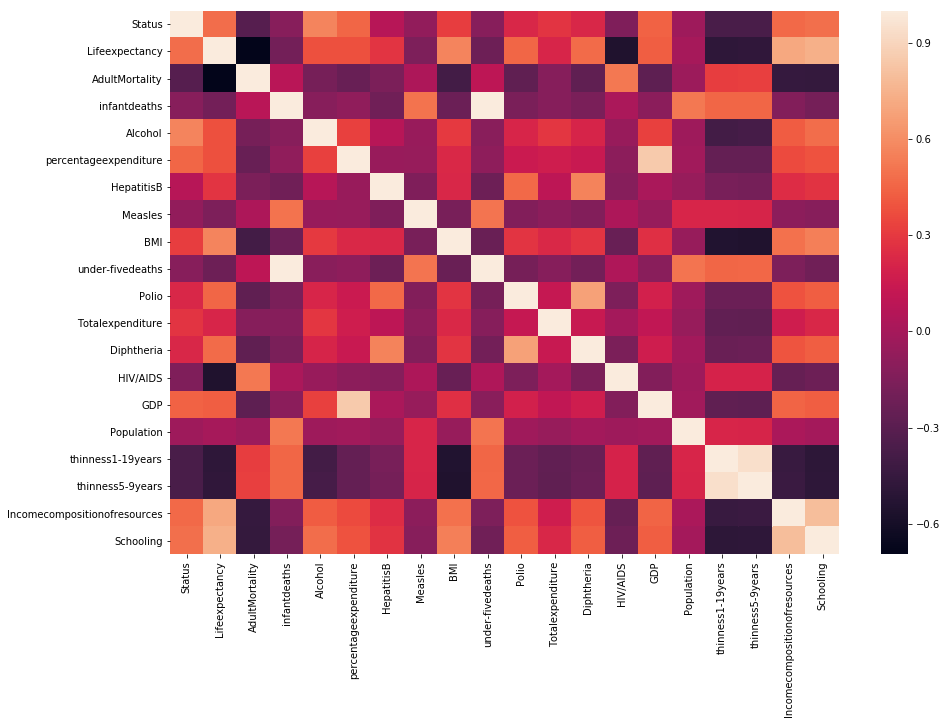

In [10]:
plt.figure(figsize = (15, 10))
sns.heatmap(data.corr())

In [11]:
print(data.corr()['Lifeexpectancy'].sort_values()[::-1])

Lifeexpectancy                  1.000000
Schooling                       0.736323
Incomecompositionofresources    0.705641
BMI                             0.567361
Status                          0.481907
Diphtheria                      0.470947
Polio                           0.456336
GDP                             0.429252
percentageexpenditure           0.381847
Alcohol                         0.380721
HepatitisB                      0.284345
Totalexpenditure                0.212256
Population                      0.003051
Measles                        -0.156446
infantdeaths                   -0.195148
under-fivedeaths               -0.221021
thinness5-9years               -0.480438
thinness1-19years              -0.484921
HIV/AIDS                       -0.553770
AdultMortality                 -0.694702
Name: Lifeexpectancy, dtype: float64


In [12]:
useful_data=data.drop(['Population','Measles','infantdeaths','under-fivedeaths','thinness5-9years','thinness1-19years','HIV/AIDS','AdultMortality'],axis=1)


In [13]:
print(useful_data.describe())

            Status  Lifeexpectancy      Alcohol  percentageexpenditure  \
count  2938.000000     2938.000000  2938.000000            2938.000000   
mean      0.174268       69.195643     4.607270             738.251295   
std       0.379405        9.536654     4.044785            1987.914858   
min       0.000000       36.300000     0.010000               0.000000   
25%       0.000000       63.025000     0.880000               4.685343   
50%       0.000000       72.000000     3.765000              64.912906   
75%       0.000000       75.600000     7.665000             441.534144   
max       1.000000       89.000000    17.870000           19479.911610   

        HepatitisB          BMI        Polio  Totalexpenditure   Diphtheria  \
count  2938.000000  2938.000000  2938.000000       2938.000000  2938.000000   
mean     75.683799    38.020150    82.307692          5.905211    82.075221   
std      28.851806    20.175077    23.636677          2.484620    23.917022   
min       1.00000

In [14]:
useful_data[['percentageexpenditure','Incomecompositionofresources','Schooling']]=useful_data[['percentageexpenditure','Incomecompositionofresources','Schooling']].replace(0.,method="ffill")

In [15]:
print(useful_data.describe())

            Status  Lifeexpectancy      Alcohol  percentageexpenditure  \
count  2938.000000     2938.000000  2938.000000            2938.000000   
mean      0.174268       69.195643     4.607270             842.937078   
std       0.379405        9.536654     4.044785            2012.731242   
min       0.000000       36.300000     0.010000               0.099872   
25%       0.000000       63.025000     0.880000              29.299697   
50%       0.000000       72.000000     3.765000             140.836502   
75%       0.000000       75.600000     7.665000             645.958382   
max       1.000000       89.000000    17.870000           19479.911610   

        HepatitisB          BMI        Polio  Totalexpenditure   Diphtheria  \
count  2938.000000  2938.000000  2938.000000       2938.000000  2938.000000   
mean     75.683799    38.020150    82.307692          5.905211    82.075221   
std      28.851806    20.175077    23.636677          2.484620    23.917022   
min       1.00000

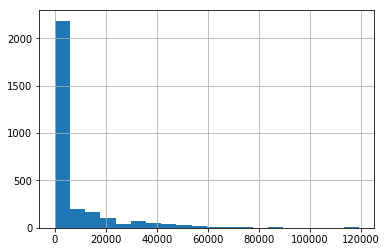

In [16]:
useful_data['GDP'].hist(bins=20)

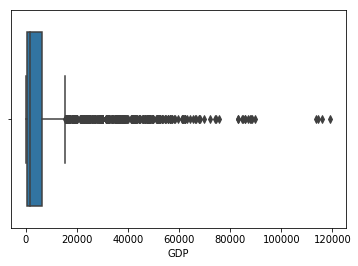

In [17]:
sns.boxplot(x=useful_data['GDP'])

In [18]:
print(useful_data.columns)

Index(['Status', 'Lifeexpectancy', 'Alcohol', 'percentageexpenditure',
       'HepatitisB', 'BMI', 'Polio', 'Totalexpenditure', 'Diphtheria', 'GDP',
       'Incomecompositionofresources', 'Schooling'],
      dtype='object')


{'whiskers': [<matplotlib.lines.Line2D at 0x2481864e0f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2481864e9b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24818640f60>],
 'medians': [<matplotlib.lines.Line2D at 0x24818655240>],
 'fliers': [<matplotlib.lines.Line2D at 0x24818655668>],
 'means': []}

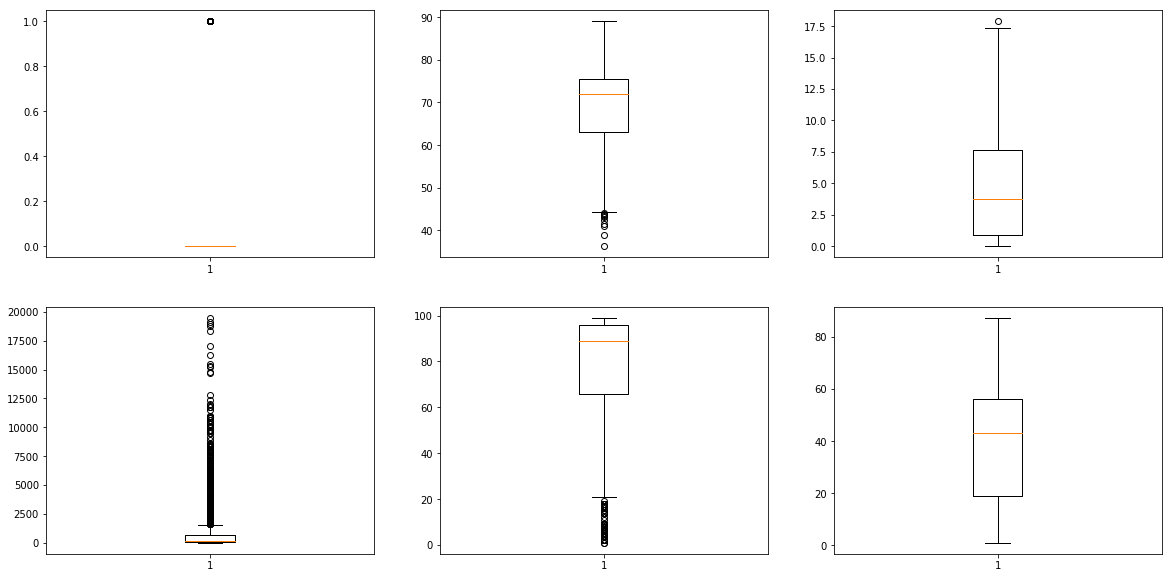

In [19]:
plt.figure(figsize=(20,10))
plt.subplot(231)
plt.boxplot(useful_data['Status'])
plt.subplot(232)
plt.boxplot(useful_data['Lifeexpectancy'])
plt.subplot(233)
plt.boxplot(useful_data['Alcohol'])
plt.subplot(234)
plt.boxplot(useful_data['percentageexpenditure'])
plt.subplot(235)
plt.boxplot(useful_data['HepatitisB'])
plt.subplot(236)
plt.boxplot(useful_data['BMI'])


{'whiskers': [<matplotlib.lines.Line2D at 0x24818afe4e0>,
 'caps': [<matplotlib.lines.Line2D at 0x24818afeda0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24818afe390>],
 'medians': [<matplotlib.lines.Line2D at 0x24818b09630>],
 'fliers': [<matplotlib.lines.Line2D at 0x24818b09a58>],
 'means': []}

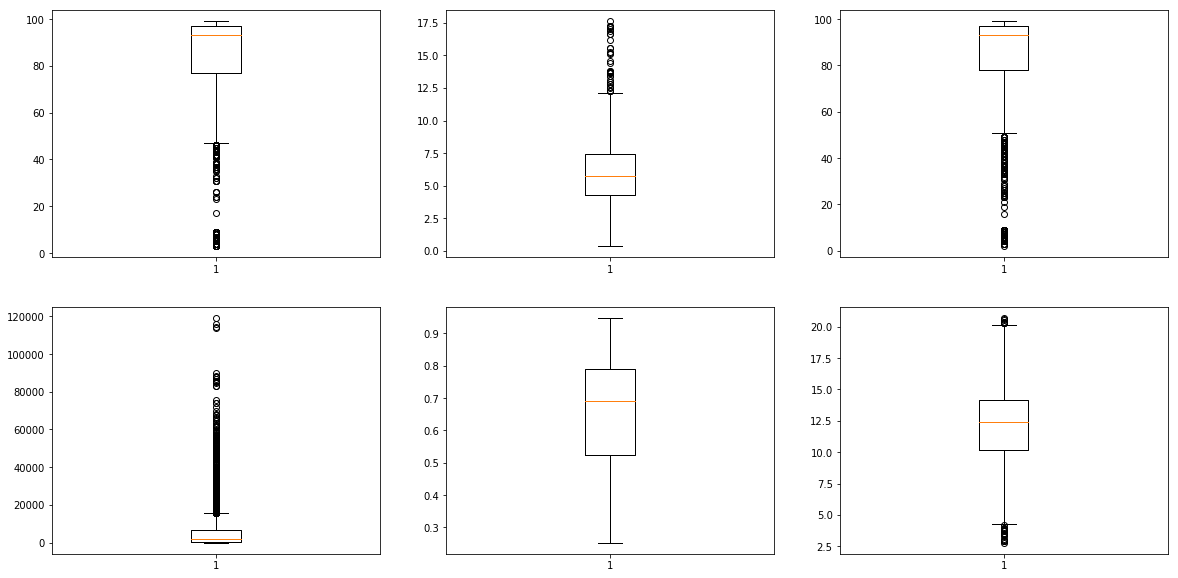

In [20]:
plt.figure(figsize=(20,10))
plt.subplot(231)
plt.boxplot(useful_data['Polio'])
plt.subplot(232)
plt.boxplot(useful_data['Totalexpenditure'])
plt.subplot(233)
plt.boxplot(useful_data['Diphtheria'])
plt.subplot(234)
plt.boxplot(useful_data['GDP'])
plt.subplot(235)
plt.boxplot(useful_data['Incomecompositionofresources'])
plt.subplot(236)
plt.boxplot(useful_data['Schooling'])

In [21]:
print(useful_data.corr()['Lifeexpectancy'].sort_values()[::-1])

Lifeexpectancy                  1.000000
Incomecompositionofresources    0.861236
Schooling                       0.774300
BMI                             0.567361
Status                          0.481907
Diphtheria                      0.470947
Polio                           0.456336
GDP                             0.429252
percentageexpenditure           0.384820
Alcohol                         0.380721
HepatitisB                      0.284345
Totalexpenditure                0.212256
Name: Lifeexpectancy, dtype: float64


In [22]:
useful_data.drop(['Totalexpenditure','Alcohol','HepatitisB','percentageexpenditure','Status'],axis=1,inplace=True)

In [23]:
print(useful_data.shape)

(2938, 7)


In [24]:
print(useful_data.columns)
useful_data=useful_data[['Lifeexpectancy','BMI', 'Polio', 'Diphtheria', 'GDP',
       'Incomecompositionofresources', 'Schooling']].astype(np.float64)

Index(['Lifeexpectancy', 'BMI', 'Polio', 'Diphtheria', 'GDP',
       'Incomecompositionofresources', 'Schooling'],
      dtype='object')


In [25]:
print(useful_data.corr()['Lifeexpectancy'].sort_values()[::-1])

Lifeexpectancy                  1.000000
Incomecompositionofresources    0.861236
Schooling                       0.774300
BMI                             0.567361
Diphtheria                      0.470947
Polio                           0.456336
GDP                             0.429252
Name: Lifeexpectancy, dtype: float64


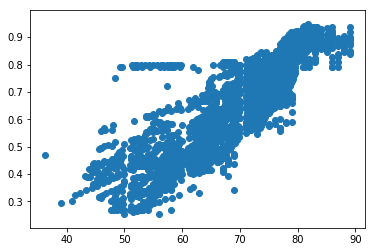

In [26]:
plt.scatter(useful_data['Lifeexpectancy'],useful_data['Incomecompositionofresources'])


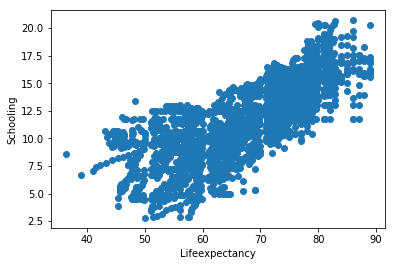

In [27]:
plt.scatter(useful_data['Lifeexpectancy'],useful_data['Schooling'])
plt.xlabel('Lifeexpectancy')
plt.ylabel('Schooling')
plt.show()

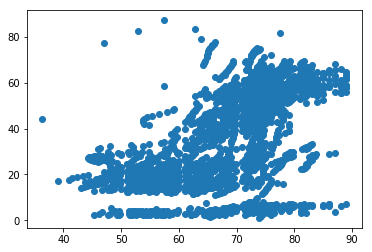

In [28]:
plt.scatter(useful_data['Lifeexpectancy'],useful_data['BMI'])

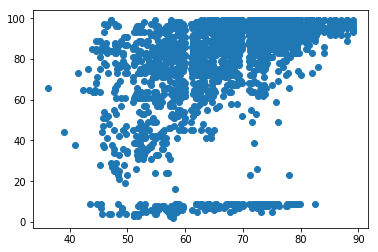

In [29]:
plt.scatter(useful_data['Lifeexpectancy'],useful_data['Diphtheria'])

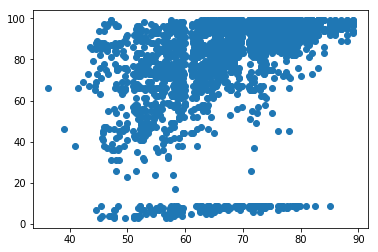

In [30]:
plt.scatter(useful_data['Lifeexpectancy'],useful_data['Polio'])

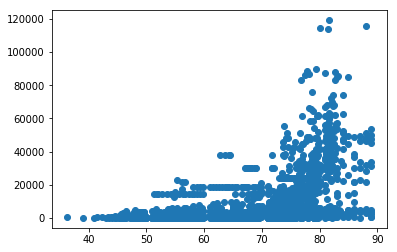

In [31]:
plt.scatter(useful_data['Lifeexpectancy'],useful_data['GDP'])

{'whiskers': [<matplotlib.lines.Line2D at 0x248191a6470>,
 'caps': [<matplotlib.lines.Line2D at 0x248191a6d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x248191a6320>],
 'medians': [<matplotlib.lines.Line2D at 0x248191af5c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x248191af9e8>],
 'means': []}

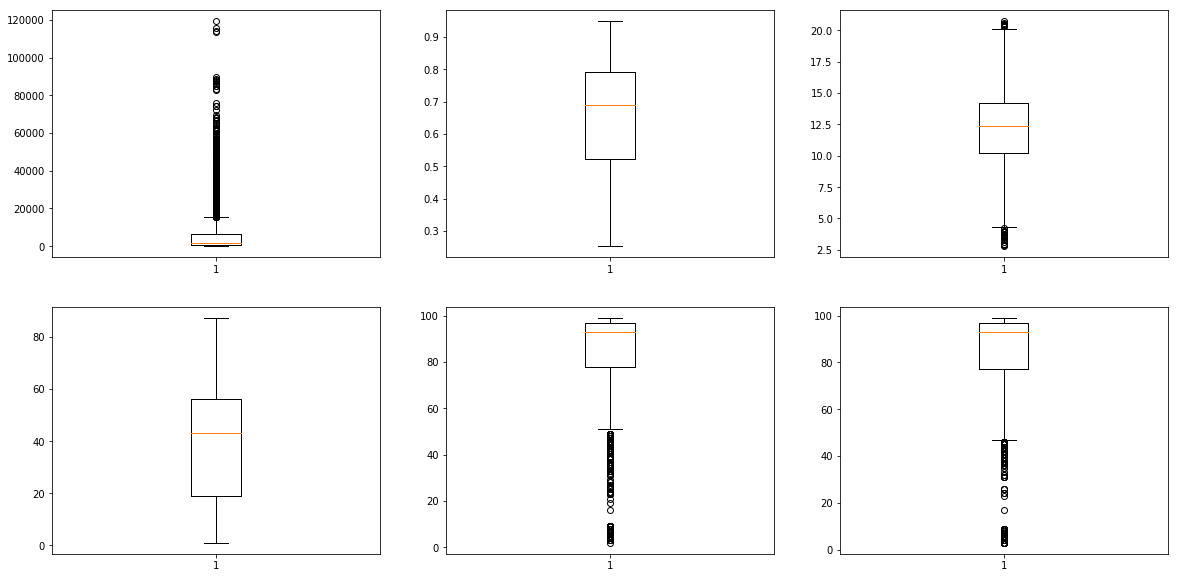

In [32]:
plt.figure(figsize=(20,10))
plt.subplot(231)
plt.boxplot(useful_data['GDP'])
plt.subplot(232)
plt.boxplot(useful_data['Incomecompositionofresources'])
plt.subplot(233)
plt.boxplot(useful_data['Schooling'])
plt.subplot(234)
plt.boxplot(useful_data['BMI'])
plt.subplot(235)
plt.boxplot(useful_data['Diphtheria'])
plt.subplot(236)
plt.boxplot(useful_data['Polio'])


In [33]:
use_data=useful_data[useful_data.Schooling>useful_data.Schooling.quantile(0.15)]
use_data=useful_data[useful_data.Schooling<useful_data.Schooling.quantile(0.85)]

print(use_data.shape)

(2483, 7)


{'whiskers': [<matplotlib.lines.Line2D at 0x24819270c50>,
 'caps': [<matplotlib.lines.Line2D at 0x2481927b550>,
 'boxes': [<matplotlib.lines.Line2D at 0x24819270b00>],
 'medians': [<matplotlib.lines.Line2D at 0x2481927bda0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24819281208>],
 'means': []}

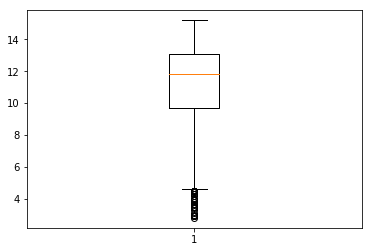

In [34]:
plt.boxplot(use_data['Schooling'])

In [35]:
predictor=['BMI', 'Polio', 'Diphtheria', 'GDP',
       'Incomecompositionofresources', 'Schooling']
target=["Lifeexpectancy"]
max1=use_data[target].max()
min1=use_data[target].min()

min_max_scaler = preprocessing.MinMaxScaler()
normalized_train = min_max_scaler.fit_transform(use_data)
print(normalized_train)

use_data=pd.DataFrame(normalized_train,columns=['Lifeexpectancy', 'BMI', 'Polio', 'Diphtheria', 'GDP',
      'Incomecompositionofresources', 'Schooling'])
print(use_data.head())
train,test=train_test_split(use_data,test_size=0.3,shuffle=False)



[[5.55125725e-01 2.09733488e-01 3.12500000e-02 ... 4.88858501e-03
  3.43465046e-01 5.88709677e-01]
 [4.56479691e-01 2.03939745e-01 5.72916667e-01 ... 5.12721093e-03
  3.38905775e-01 5.80645161e-01]
 [4.56479691e-01 1.98146002e-01 6.14583333e-01 ... 5.28705227e-03
  3.29787234e-01 5.72580645e-01]
 ...
 [1.64410058e-01 2.93163384e-01 7.29166667e-01 ... 4.67118357e-04
  2.64437690e-01 5.80645161e-01]
 [1.74081238e-01 2.88528389e-01 7.60416667e-01 ... 4.58925145e-03
  2.64437690e-01 5.64516129e-01]
 [1.87620890e-01 2.83893395e-01 7.81250000e-01 ... 4.57894330e-03
  2.75075988e-01 5.64516129e-01]]
   Lifeexpectancy       BMI     Polio  Diphtheria       GDP  \
0        0.555126  0.209733  0.031250    0.649485  0.004889   
1        0.456480  0.203940  0.572917    0.618557  0.005127   
2        0.456480  0.198146  0.614583    0.639175  0.005287   
3        0.448743  0.192352  0.666667    0.670103  0.005608   
4        0.442940  0.187717  0.677083    0.680412  0.000519   

   Incomecompositiono

In [36]:
print(use_data.columns)
print(max1,min1)

Index(['Lifeexpectancy', 'BMI', 'Polio', 'Diphtheria', 'GDP',
       'Incomecompositionofresources', 'Schooling'],
      dtype='object')
Lifeexpectancy    88.0
dtype: float64 Lifeexpectancy    36.3
dtype: float64


In [37]:
x_train=train[predictor]
y_train=train[target]
x_test=test[predictor]
y_test=test[target]
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_train.columns)
print(x_test.columns)

(1738, 6)
(1738, 1)
(745, 6)
(745, 1)
Index(['BMI', 'Polio', 'Diphtheria', 'GDP', 'Incomecompositionofresources',
       'Schooling'],
      dtype='object')
Index(['BMI', 'Polio', 'Diphtheria', 'GDP', 'Incomecompositionofresources',
       'Schooling'],
      dtype='object')


In [38]:
lm=LinearRegression()
lm.fit(x_train,y_train)

#l=pd.DataFrame(dict(BMI=['29'],Polio=['99'],Diphtheria=['99'],GDP=['5491.16'],Incomecompositionofresources=['0.72'],Schooling=['13.3']))
predict=lm.predict(x_test)
predict1=predict*(max1[0]-min1[0])+min1[0]
print(predict1)
mse=mean_squared_error(y_test,predict)
mse=mse*(max1[0]-min1[0])+min1[0]


[[76.795891  ]
 [76.78109856]
 [76.657156  ]
 [74.22143976]
 [76.76148639]
 [76.08790744]
 [75.80512807]
 [75.11444424]
 [74.87443722]
 [74.53511307]
 [74.19162283]
 [73.83715391]
 [73.74087837]
 [73.63447207]
 [73.46567295]
 [74.88844884]
 [76.63648022]
 [76.51384233]
 [76.29654652]
 [76.09249531]
 [76.0671518 ]
 [75.85639901]
 [75.42171463]
 [75.4328404 ]
 [75.06801218]
 [74.62789805]
 [74.4335986 ]
 [74.05889084]
 [74.01776575]
 [73.8298507 ]
 [73.39473193]
 [61.96870347]
 [61.01815498]
 [60.81662634]
 [61.09781006]
 [60.5770044 ]
 [60.1445309 ]
 [59.6660711 ]
 [59.13103235]
 [58.5470119 ]
 [58.00073737]
 [57.17458384]
 [56.22709552]
 [56.31579368]
 [55.18263193]
 [54.01673932]
 [49.46168303]
 [73.04071979]
 [74.21728682]
 [73.57401317]
 [74.1069763 ]
 [74.12198745]
 [74.10323121]
 [73.54700765]
 [73.08936745]
 [72.81120945]
 [72.70481726]
 [70.03613934]
 [71.77961421]
 [71.31510915]
 [66.79334761]
 [69.46006318]
 [71.4798252 ]
 [65.85804458]
 [73.52844807]
 [73.49146695]
 [73.25174

In [39]:
print("Mean squared error:",mse)
print("Root mean squared error:",np.sqrt(mse))


Mean squared error: 36.92589710333968
Root mean squared error: 6.076668256811431
